In [1]:
#rappel de l'énigme et du but de l'énigme.
#Bob est victime d'un 'mauvais sort' et se sent en permanence déphasé.
#le rituel permettant de lever la malédiction de Bob est consigné dans un grimoire, présent dans une bibliothèque 
#quantique.
#l'emprunt dans une blibliothèque quantique est toujours fait au hasard : en empruntant un grimoire, on ne sait
#jamais sur lequel on va tomber.
#la bonne nouvelle est que cette section de la bibliothèque quantique ne compte que trois autres grimoires mais
#qui contiennent des malédictions.

In [2]:
#Aika a le pouvoir de 'marquer' le bon grimoire, en inversant sa phase quantique.
#pour résoudre l'énigme, le but sera de maitriser les phénomènes d'inversion de phase et d'interférences pour 
#maximiser les probabilités d'obtenir le bon grimoire.

In [3]:
#l'algorithme de grover va nous permettre de réaliser cela.

In [4]:
#initialement, la probabilité d'emprunter n'importe lequel des quatres grimoires est égale pour chacun des 
#grimoires

In [5]:
#dans l'état initial/actuel, il y a une chance sur 4 de tomber sur le bon grimoire lorsque l'on réalise un emprunt
#auprès de la bibliothèque quantique.
#on attribue donc à chacun des grimoires, une probabilité de 1/4.

In [6]:
#pour représenter la situation actuelle dans le monde quantique, on assigne chaque grimpoire à un état quantique.
#ensuite, on va utiliser un histogramme d'amplitudes de probabilités, avec lequel on peut observer la phase de 
#chaque état quantique.

#pour rappel, on dispose de quatre états :
#état 1 => 00
#état 2 => 10
#état 3 => 01
#état 4 => 11

In [7]:
#amplitudes de probabilités de chaque états : fixés à 1/2.

#les probabilités d'obtenir chacun des états (ou résultats) sont données par le carré de l'amplitude de probabilité
#soit : (1/2)^2 => 1/4

#ainsi, initialement, chaque grimoire a une amplitude de probabilité de 1/2, et donc une probabilité de mesure
#de 1/4.

In [8]:
#inversion de phase :

#Aika utilise son pouvoir pour marquer le grimoire dans lequel se trouve le rituel, en inversant la phase du 
#grimoire.

#cependant, même lorsque la phase du grimoire est inversée, la probabilité d'emprunter le bon grimoire reste la 
#même (1/4)

In [9]:
#utilisation du diffuseur :

#on va utiliser un opérateur quantique de notre conception : le diffuseur.
#celui-ci agit de la manière suivante : 

#on prend comme situation, un grimoire qui a 100% de chances d'être emprunté, par exemple celui correspondant à
#l'état 1 "00".

#le diffuseur va alors produire une superposition uniforme de tous les états "00", "10", "01" et "11".
#la phase du grimoire d'origine "00" est alors inversée.

In [10]:
#phase des grimoires/états en utilisant le diffuseur :

#cas n°1, état/grimoire "00" : 
#état "00" => phase inversée
#état "10" => phase d'origine
#état "01" => phase d'origine
#état "11" => phase d'origine

#cas n°2, état/grimoire "01" : 
#état "00" => phase d'origine
#état "10" => phase inversée
#état "01" => phase d'origine
#état "11" => phase d'origine

#cas n°3, état/grimoire "10" : 
#état "00" => phase inversée
#état "10" => phase inversée
#état "01" => phase d'origine
#état "11" => phase inversée

#cas n°4, état/grimoire "11" : 
#état "00" => phase d'origine
#état "10" => phase d'origine
#état "01" => phase d'origine
#état "11" => phase inversée

In [11]:
#le diffuseur, lorsqu'appliqué sur l'état préparé par Aika, agit sur les quatre grimoires/états en parallele, de
#manière à ce que les quatre grimoires/états aient 100% de chances d'être empruntés.

#l'état produit par le diffuseur correspond à la somme des quatre états/résultats individuels.

#ainsi, l'application du diffuseur permet aux amplitudes de probabilités d'interférer entre elles.
#les amplitudes négatives compensent celles positives, et les amplitudes positives s'additionnent entre elles, ce
#augmente l'amplitude associée au grimoire/à l'état recherché et diminue l'amplitude des autres.

In [12]:
#en prenant le cas du grimopire/état "00", l'application combinée de l'inversion de phase ainsi que de l'opérateur
#d'interférence augmente à 100%, la probabilité d'emprunt du bon grimoire.

In [13]:
#utilisation des portes quantiques
#porte X/NOT => transformation de l'état d'un Qubit en son état opposé

#porte Hadamard => dans le cadre de cet algorithme, la porte hadamard est utilisée pour passer de la base/de l'axe
#"0/1" à la base/l'axe "+/-".

#porte Z => rotation de 180° autour de l'axe des "Z", ce qui équivaut à inverser la phase de l'état "1" et peut,
#par exemple, transformer l'état "+" en l'état "-".

#porte Contrôle-Z => un Qubit de contrôle et un Qubit cible => si le qubit de contrôle est à l'état "1", une porte
#Z est appliquée au qubit cible.

#une porte Z n'a d'effet que sur l'état "1", la porte Contrôle-Z n'a d'effet que si les deux qubits (qubit de 
#contrôle et qubit cible) sont dans l'état "1".

In [14]:
#association des qubits et des grimoires.

#comme il y a quatre grimoires, il est possible d'utiliser un système de deux qubits possédant les quatre états
#de base : "00", "10", "01" et "11".

#chacun de ces états de base est associé à un grimoire en particulier.
#RAPPEL : chacun des qubits sont notés/numérotés de la droite vers la gauche.

In [15]:
#RAPPEL : à l'origine, tous les grimoires ont la même probabilité d'être empruntés, conformément à la "politique"
#de la bibliothèque quantique.

#pour obtenir cette distribution initiale, on ajoute des portes hadamard sur les qubits "q0" et "q1".

In [16]:
#Step - 1 - import des bibliothèques
import numpy as np
from qiskit import *
from qiskit.visualization import *

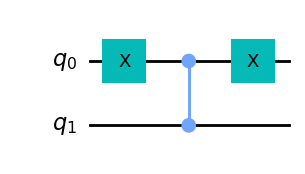

In [18]:
#illustration/définition du pouvoir d'inversion de phase dans l'oracle d'Aika

def oracle():
    #création du circuit
    circ_oracle = QuantumCircuit(2)
    #application d'une porte X/NOT au qubit de contrôle "q0"
    circ_oracle.x(0)
    #application d'une porte contrôle-Z du qubit de contrôle "q0" au qubit cible "q1"
    circ_oracle.cz(0, 1)
    #application d'une seconde porte X/NOT au qubit de contrôle "q0"
    circ_oracle.x(0)
    return circ_oracle
    
#on affiche le circuit à ce stade
circ = oracle()
circ.draw(output='mpl')

In [19]:
#illustration de l'inversion de phase pour les quatre grimoires

In [20]:
#RAPPEL : une porte Z n'a d'effet que sur l'état "1" d'un qubit, et fait faire une rotation de 180° 
#sur l'axe des Z, rotation équivalente à une inversion de phase de l'état 1. Elle peut par ex, transformer l'état 
#"+" en l'état "-".

#ainsi, l'application d'une porte CZ/contrôle-Z n'aura d'effet que si les deux qubits (qubits de contrôle et qubit
#cible sont à l'état "1")

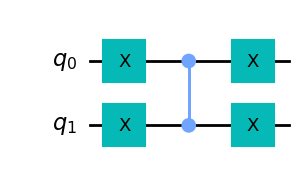

In [23]:
#illustration/définition de l'inversion de phase dans l'oracle d'Aika pour le grimoire N°1, état => "00"

def grimoire_1():
    #création du circuit
    circ_grimoire_1 = QuantumCircuit(2)
    #application de portes X/NOT aux qubits de contrôle et cible "q0" et "q1".
    #cette étape est nécessaire pour le qubit cible "q1" puisse être à l'état "1" et que sa phase soit ainsi 
    #modifiée.
    circ_grimoire_1.x(0)
    circ_grimoire_1.x(1)
    #application d'une porte CZ/Contrôle-Z du qubit de contrôle "q0" au qubit cible "q1" pour modifier la phase
    #du qubit "q1".
    circ_grimoire_1.cz(0, 1)
    #application de portes X/NOT aux qubits de contrôle et cible "q0" et "q1" pour faire "revenir" les deux qubits
    #à leurs états initiaux.
    circ_grimoire_1.x(0)
    circ_grimoire_1.x(1)
    return circ_grimoire_1

#on affiche le circuit à ce stade
circ = grimoire_1()
circ.draw(output='mpl')

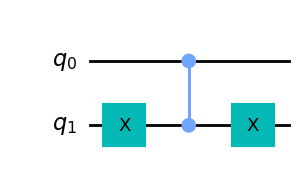

In [24]:
#illustration/définition de l'inversion de phase dans l'oracle d'Aika pour le grimoire N°2, état => "01" (ou "10"
#dans le sens de lecture des qubits)

def grimoire_2():
    #création du circuit
    circ_grimoire_2 = QuantumCircuit(2)
    #application d'une porte X/NOT au qubit cible "q1".
    #cette étape est nécessaire pour le qubit cible "q1" puisse être à l'état "1" et que sa phase soit ainsi 
    #modifiée.
    circ_grimoire_2.x(1)
    #application d'une porte CZ/Contrôle-Z du qubit de contrôle "q0" au qubit cible "q1" pour modifier la phase
    #du qubit "q1".
    circ_grimoire_2.cz(0, 1)
    #application d'une porte X/NOT au qubit cible "q1" pour le faire "revenir" à son état initial.
    circ_grimoire_2.x(1)
    return circ_grimoire_2

#on affiche le circuit à ce stade
circ = grimoire_2()
circ.draw(output='mpl')

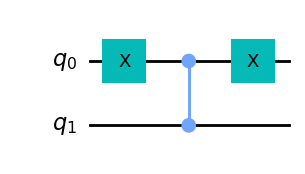

In [27]:
#illustration/définition de l'inversion de phase dans l'oracle d'Aika pour le grimoire N°3, état => "10" (ou "01"
#dans le sens de lecture des qubits)

def grimoire_3():
    #création du circuit
    circ_grimoire_3 = QuantumCircuit(2)
    #application d'une porte X/NOT au qubit de contrôle "q0".
    #cette étape est nécessaire pour le qubit de contrôle "q0" puisse être à l'état "1" et que la porte CZ/
    #Contrôle-Z soit ainsi appliquée.
    circ_grimoire_3.x(0)
    #application d'une porte CZ/Contrôle-Z du qubit de contrôle "q0" au qubit cible "q1" pour modifier la phase
    #du qubit "q1".
    circ_grimoire_3.cz(0, 1)
    #application d'une porte X/NOT au qubit cible "q0" pour le faire "revenir" à son état initial.
    circ_grimoire_3.x(0)
    return circ_grimoire_3

#on affiche le circuit à ce stade
circ = grimoire_3()
circ.draw(output='mpl')

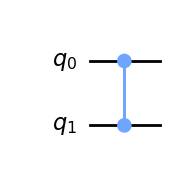

In [28]:
#illustration/définition de l'inversion de phase dans l'oracle d'Aika pour le grimoire N°4, état => "11"

def grimoire_4():
    #création du circuit
    circ_grimoire_4 = QuantumCircuit(2)
    #application d'une porte CZ/Contrôle-Z du qubit de contrôle "q0" au qubit cible "q1" pour modifier la phase
    #du qubit "q1".
    circ_grimoire_4.cz(0, 1)
    return circ_grimoire_4

#on affiche le circuit à ce stade
circ = grimoire_4()
circ.draw(output='mpl')

In [ ]:
#diffuseur quantique
#on passe maintenant à la création du diffuseur quantique, qui va agir en priorité sur les différentes amplitudes
#de probabilité

#RAPPEL : 

#le diffuseur, lorsqu'appliqué sur l'état préparé par Aika, agit sur les quatre grimoires/états en parallele, de
#manière à ce que les quatre grimoires/états aient 100% de chances d'être empruntés.

#l'état produit par le diffuseur correspond à la somme des quatre états/résultats individuels.

#ainsi, l'application du diffuseur permet aux amplitudes de probabilités d'interférer entre elles.
#les amplitudes négatives compensent celles positives, et les amplitudes positives s'additionnent entre elles, ce
#augmente l'amplitude associée au grimoire/à l'état recherché et diminue l'amplitude des autres.

In [ ]:
#la combinaison de l'application de l'inversion de phase et de l'opérateur d'interférence augmente à 100% la
#probabilité d'emprunt du bon grimoire

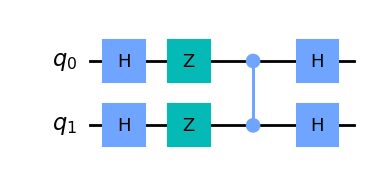

In [29]:
#création du diffuseur quantique
def diffuseur_quantique():
    #création du circuit
    diffuseur_quantique = QuantumCircuit(2)
    
    #application de portes hadamard sur les qubits, pour la possibilité d'application du diffuseur aux quatre
    #grimoires - passage de la base 0/1 à la base +/- qui correspond à la phase des qubits. cette
    #dernière entrera en superposition d'états grâce à l'application de portes hadamard dessus.
    diffuseur_quantique.h(0)
    diffuseur_quantique.h(1)
    
    #création de portes Z, pour l'inversion des phases des qubits. ces portes permettent d'effectuer une rotation
    #de 180° autour de l'axe des Z, permettant de faire passer le qubit de l'état "+" à l'état "-", seulement si
    #le qubit se trouve à l'état "1"
    diffuseur_quantique.z(0)
    diffuseur_quantique.z(1)
    
    #application d'une porte CZ/Contrôle-Z, afin d'inverser la phase du qubit "q1", si ce dernier est à l'état "1"
    #et que le qubit de contrôle "q0" est également à l'état "1".
    diffuseur_quantique.cz(0, 1)
    
    #nouvelle application de portes hadamard sur les qubits, pour la possibilité d'application du diffuseur 
    #grimoires - passage de la base 0/1 à la base +/- qui correspond à la phase des qubits. cette
    #dernière entrera en superposition d'états grâce à l'application de portes hadamard dessus.
    diffuseur_quantique.h(0)
    diffuseur_quantique.h(1)
    return diffuseur_quantique
    
#on affiche le circuit à ce stade
circ = diffuseur_quantique()
circ.draw(output='mpl')

In [17]:
#définition de l'oracle pour les quatre grimoires
#création du circuit
circ_grim_1 = QuantumCircuit(2)

In [18]:
#application de portes hadamard sur chacun des qubits "q0" et "q1", afin d'obtenir la distribution de probabilité
#d'origine => tous les grimoires ont la même chance d'être empruntés.
circ_grim_1.h(0)
circ_grim_1.h(1)

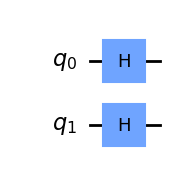

In [19]:
#on affiche le circuit à ce stade
circ_grim_1.draw(output='mpl')

In [ ]:
#création du diffuseur

